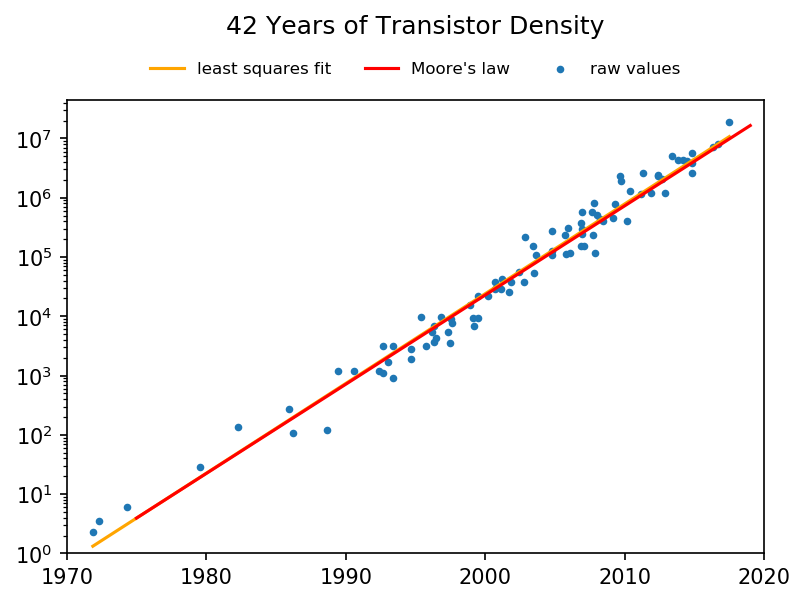

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

times = []
transistors = []

with open('../data/ad_hoc_exprs/42_yrs_transistors.dat') as fh:
    for line in fh:
        if not line.strip():
            continue

        comps = line.split()
        try:
            times.append(float(comps[0]))
            transistors.append(float(comps[1]))
        except ValueError:
            pass


coeffs = np.polyfit(times, np.log(transistors), 1)
poly = np.poly1d(coeffs)
preds = np.exp(poly(times))

# Moore's law: In 1975, looking forward to the next decade, he revised the forecast to doubling every two years
#   https://en.wikipedia.org/wiki/Moore%27s_law
start_time = 1975
moores_times = [start_time]
moores_values = [np.exp(poly(start_time))]

for t in range(start_time + 2, 2021, 2):
    moores_times.append(t)
    moores_values.append(moores_values[-1] * 2)


fig, ax = plt.subplots()
fig.set_dpi(150)

plt.scatter(times, transistors, s=7, label='raw values')
plt.plot(times, preds, color='orange', label='least squares fit')
plt.plot(moores_times, moores_values, color='r', label='Moore\'s law')

ax.set_yscale('log', nonposy='clip')
ax.set_ylim(ymin=1)
ax.set_xlim(xmin=1970, xmax=2020)
ax.set_title('42 Years of Transistor Density', y=1.12)

plt.legend(loc=8,
           bbox_to_anchor=(0.5, 1.02),
           ncol=3,
           frameon=False,
           prop={'size': 8})

plt.show()